# Project: Predicting Titanic Survivors

## Project Goal:

Build a machine learning model that predicts whether a passenger survived the Titanic disaster based on features such as age, sex, ticket class, and more.

In [17]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

## Setup

In [18]:
# import the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 1. Exploratory Data Analysis (EDA)

In [19]:
# check the first few rows of the training dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# check the shape of the training dataset
train_df.shape

(891, 12)

In [21]:
# check the columns of the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
# Statistical summary of numeric features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#check for missing values in the training dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
# filling age with the median age
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# filling embarked with the most common value
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# dropping the Cabin column
train_df = train_df.drop(columns=['Cabin'])

# check missing values again
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

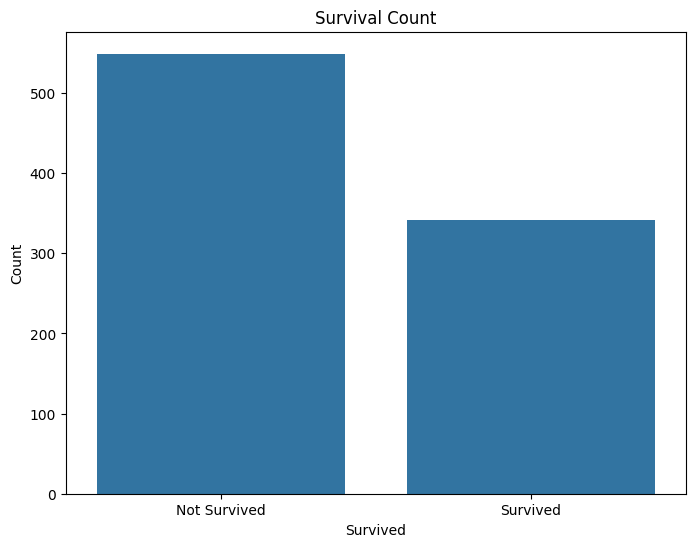

In [24]:
# Visualize the survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

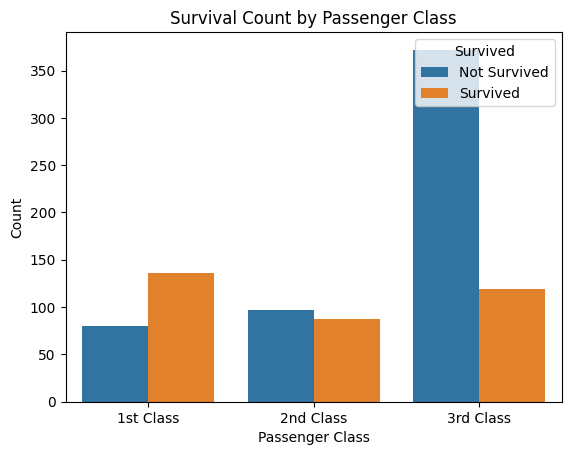

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

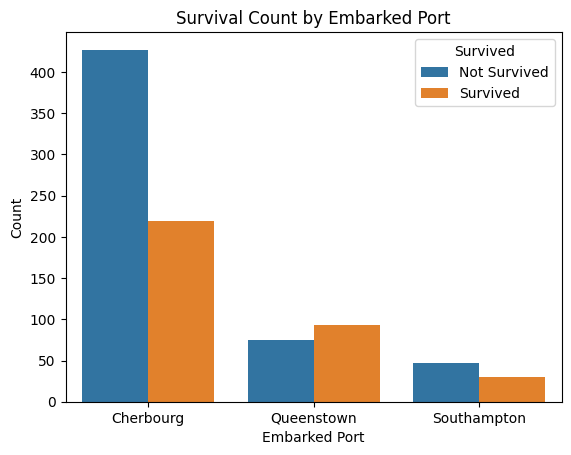

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

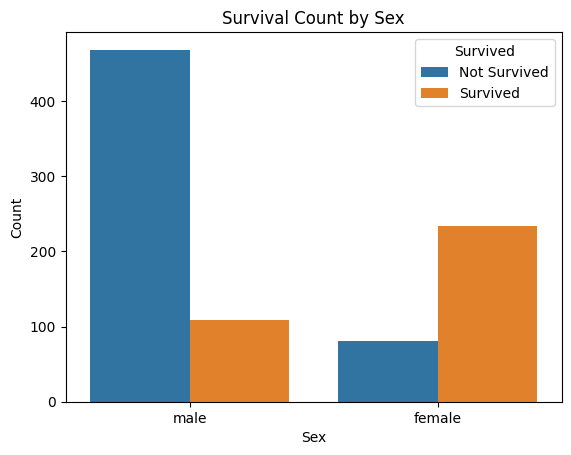

In [27]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


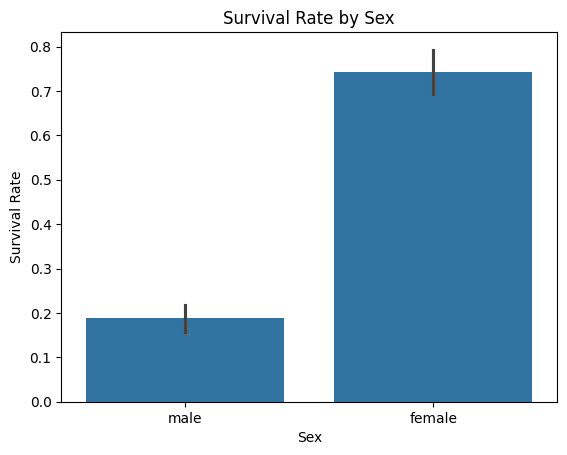

In [28]:
sns.barplot(x= 'Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


In [29]:
# check missing values for test dataset
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
# filling age with the median age
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# filling Fare with the median Fare
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# dropping the Cabin column
test_df = test_df.drop(columns=['Cabin'])

# check missing values again
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

## 2. Data Preprocessing

In [31]:
# preprocessing
## imports

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Define X and y for training data
X_train = train_df.drop(columns='Survived')
y_train = train_df['Survived']

# Define X for test data
X_test = test_df.copy()

#Take only the relevant columns
X_train = X_train[['Age', 'Fare', 'Sex', 'Embarked']]
X_test = X_test[['Age', 'Fare', 'Sex', 'Embarked']]


In [33]:
# Define columns
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

In [34]:
# Preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [35]:
# Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## 3. Model Building

In [36]:
models = {"RandomForestClassifier": RandomForestClassifier(),
          "LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          }

predictions = {}

In [37]:
# Loop through the items in the regression_models dictionary
for model_name, model in models.items():
    
    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)
    
    # prediction of y
    print(f"Predicting with {model_name}...")
    y_preds = model_pipeline.predict(X_test)
    
    # Save predictions in a dictionary (for later use)
    predictions[model_name] = y_preds

Fitting RandomForestClassifier...
Predicting with RandomForestClassifier...
Fitting LogisticRegression...
Predicting with LogisticRegression...
Fitting KNN...
Predicting with KNN...


In [39]:
# getting predictions by models
pred_df = pd.DataFrame(predictions)
pred_df.head(10)

,RandomForestClassifier,LogisticRegression,KNN
0,0,0,0
1,0,1,1
2,0,0,0
3,1,0,1
4,1,1,1
5,0,0,0
6,0,1,1
7,1,0,1
8,1,1,1
9,0,0,0


In [40]:
# cross-validation to evaluate the models
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"{model_name} CV Accuracy: {scores.mean():.4f}")

RandomForestClassifier CV Accuracy: 0.7733
LogisticRegression CV Accuracy: 0.7800
KNN CV Accuracy: 0.7632


Best Model is Logistic Regression, with an accuracy of 0.78

## 4. Evaluation

In [43]:
from sklearn.model_selection import train_test_split

# Split original X_train and y_train into training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train_split.shape, X_val_split.shape, y_train_split.shape, y_val_split.shape

((712, 4), (179, 4), (712,), (179,))

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Use the best model, Logistic Regression in this case, for final training and evaluation
final_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(random_state=42))
])

final_model.fit(X_train_split, y_train_split)
y_pred = final_model.predict(X_val_split)

# Evaluate
print("Accuracy:", accuracy_score(y_val_split, y_pred))
print("Precision:", precision_score(y_val_split, y_pred))
print("Recall:", recall_score(y_val_split, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val_split, y_pred))

Accuracy: 0.776536312849162
Precision: 0.7301587301587301
Recall: 0.6666666666666666
Confusion Matrix:
 [[93 17]
 [23 46]]


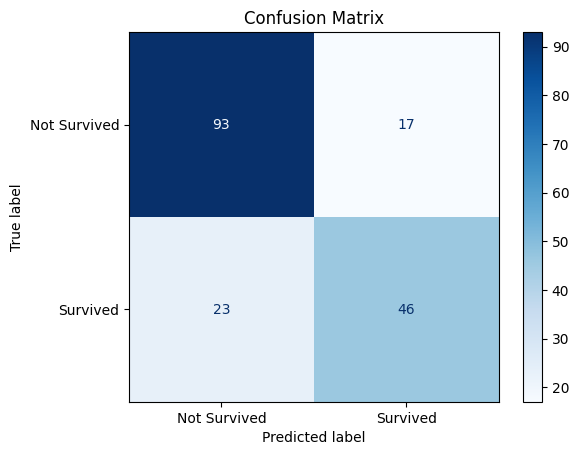

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_val_split, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Interpretation & Insights

- The model correctly predicts ~77.7% of passengers’ survival status overall (accuracy).

- Of the passengers predicted to survive, ~73% actually survived (precision), indicating moderate confidence in positive predictions.

- The model detects about 67% of actual survivors (recall), suggesting some survivors are missed (false negatives).

- The confusion matrix shows:

    > 93 true negatives (correctly predicted non-survivors)

    > 46 true positives (correctly predicted survivors)

    > 17 false positives (predicted survivors who did not survive)

    > 23 false negatives (missed survivors)

This balance indicates the model performs reasonably well but could be improved to better detect survivors (with hyperparameter tuning).

### What I Learned

- How to handle missing data with imputers and encode categorical features using pipelines.

- How to compare different models using cross-validation.

- The importance of multiple evaluation metrics beyond accuracy.

- How to interpret confusion matrices and balance precision and recall for imbalanced classification problems.